# Machine Learning Foundation

## Section 2, Part c: Cross Validation 


## Learning objectives

By the end of this lesson, you will be able to:

* Chain multiple data processing steps together using `Pipeline`
* Use the `KFolds` object to split data into multiple folds.
* Perform cross validation using SciKit Learn with `cross_val_predict` and `GridSearchCV`


In [5]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:


import pickle
import urllib.request

# 1. Tải file từ URL về thư mục hiện tại
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/boston_housing_clean.pickle"
urllib.request.urlretrieve(url, "boston_housing_clean.pickle")

# 2. Mở file pickle và load dữ liệu
with open("boston_housing_clean.pickle", "rb") as f:
    boston = pickle.load(f)

# Kiểm tra dữ liệu
print(type(boston))
print(boston.keys())  # Nếu boston là dict, xem các key


<class 'dict'>
dict_keys(['dataframe', 'description'])


In [7]:
# Hiển thị các key trong dictionary 'boston' (nếu boston là dict)
boston.keys()


dict_keys(['dataframe', 'description'])

In [8]:
!python --version

Python 3.11.9


In [36]:
# Lấy DataFrame chứa dữ liệu Boston Housing
boston_data = boston['dataframe']

# Lấy mô tả/ thông tin chi tiết về dữ liệu
boston_description = boston['description']


In [10]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Discussion: 

Suppose we want to do Linear Regression on our dataset to get an estimate, based on mean squared error, of how well our model will perform on data outside our dataset. 

Suppose also that our data is split into three folds: Fold 1, Fold 2, and Fold 3.

What would the steps be, in English, to do this?


**Your response below**


#### Coding this up

The [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) object in SciKit Learn tells the cross validation object (see below) how to split up the data:


In [37]:
# Tách dữ liệu đầu vào (features) và nhãn đầu ra (target)
# 'MEDV' là cột giá nhà trung bình, sẽ được dự đoán
X = boston_data.drop('MEDV', axis=1)  # X: tất cả các cột trừ MEDV
y = boston_data.MEDV                  # y: cột MEDV (target)


In [38]:
from sklearn.model_selection import KFold

# Tạo đối tượng KFold để thực hiện cross-validation
# shuffle=True: xáo trộn dữ liệu trước khi chia
# random_state=72018: đảm bảo kết quả chia dữ liệu giống nhau mỗi lần chạy
# n_splits=3: chia dữ liệu thành 3 phần để lần lượt làm train/test
kf = KFold(n_splits=3, shuffle=True, random_state=72018)


In [39]:
# Duyệt qua từng lần chia dữ liệu của KFold
# train_index: chỉ số của các mẫu thuộc tập huấn luyện
# test_index: chỉ số của các mẫu thuộc tập kiểm tra

for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], "Total:", len(train_index))  # Hiển thị 10 index đầu và tổng số mẫu train
    print("Test index:", test_index[:10], "Total:", len(test_index))     # Hiển thị 10 index đầu và tổng số mẫu test
    print('')


Train index: [ 1  3  4  5  7  8 10 11 12 13] Total: 337
Test index: [ 0  2  6  9 15 17 19 23 25 26] Total: 169

Train index: [ 0  2  6  9 10 11 12 13 15 17] Total: 337
Test index: [ 1  3  4  5  7  8 14 16 22 27] Total: 169

Train index: [0 1 2 3 4 5 6 7 8 9] Total: 338
Test index: [10 11 12 13 18 20 21 24 28 31] Total: 168



In [40]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Tạo danh sách để lưu các giá trị R²
scores = []

# Khởi tạo mô hình hồi quy tuyến tính
lr = LinearRegression()

# Lặp qua các lần chia dữ liệu của KFold
for train_index, test_index in kf.split(X):
    # Lấy tập train và test dựa trên index
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Huấn luyện mô hình trên tập train
    lr.fit(X_train, y_train)
    
    # Dự đoán trên tập test
    y_pred = lr.predict(X_test)
    
    # Tính R² và lưu vào danh sách
    score = r2_score(y_test.values, y_pred)
    scores.append(score)

# Hiển thị các giá trị R² của từng fold
scores


[0.6719348798472768, 0.7485020059212344, 0.6976807323597756]

A bit cumbersome, but do-able.


### Discussion (Part 2): 

Now suppose we want to do the same, but appropriately scaling our data as we go through the folds.

What would the steps be _now_?


**Your response below**


### Coding this up


In [41]:
# Danh sách lưu giá trị R² của từng fold
scores = []

# Khởi tạo mô hình hồi quy tuyến tính và scaler
lr = LinearRegression()
s = StandardScaler()

# Thực hiện KFold cross-validation
for train_index, test_index in kf.split(X):
    # Chia tập train và test theo index
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Chuẩn hóa dữ liệu train
    X_train_s = s.fit_transform(X_train)
    
    # Huấn luyện mô hình trên dữ liệu chuẩn hóa
    lr.fit(X_train_s, y_train)
    
    # Chuẩn hóa dữ liệu test theo scaler đã fit trên train
    X_test_s = s.transform(X_test)
    
    # Dự đoán trên tập test
    y_pred = lr.predict(X_test_s)
    
    # Tính R² và lưu vào danh sách
    score = r2_score(y_test.values, y_pred)
    scores.append(score)

# Kết quả: R² của từng fold
scores

[0.6719348798472715, 0.748502005921238, 0.6976807323597745]

In [16]:
scores

[0.6719348798472715, 0.748502005921238, 0.6976807323597745]

(same scores, because for vanilla linear regression with no regularization, scaling actually doesn't matter for performance)


This is getting quite cumbersome! 

_Very_ luckily, SciKit Learn has some wonderful functions that handle a lot of this for us.


### `Pipeline` and `cross_val_predict`


`Pipeline` lets you chain together multiple operators on your data that both have a `fit` method.


In [42]:
# Khởi tạo StandardScaler để chuẩn hóa dữ liệu trước khi huấn luyện
s = StandardScaler()

# Khởi tạo mô hình hồi quy tuyến tính
lr = LinearRegression()


### Combine multiple processing steps into a `Pipeline`

A pipeline contains a series of steps, where a step is ("name of step", actual_model). The "name of step" string is only used to help you identify which step you are on, and to allow you to specify parameters at that step.  


In [43]:
# Tạo pipeline gồm 2 bước:
# 1. 'scaler': chuẩn hóa dữ liệu với StandardScaler
# 2. 'regression': huấn luyện mô hình LinearRegression
estimator = Pipeline([
    ("scaler", s),
    ("regression", lr)
])


### `cross_val_predict`

[`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) is a function that does K-fold cross validation for us, appropriately fitting and transforming at every step of the way.


In [19]:
kf

KFold(n_splits=3, random_state=72018, shuffle=True)

In [44]:
# Dự đoán giá trị đầu ra bằng cross-validation
# estimator: pipeline chuẩn hóa + hồi quy tuyến tính
# X, y: dữ liệu đầu vào và nhãn
# cv=kf: sử dụng KFold cross-validation để đánh giá
predictions = cross_val_predict(estimator, X, y, cv=kf)


In [21]:
r2_score(y, predictions)

0.706353106416156

In [22]:
np.mean(scores) # almost identical!

np.float64(0.7060392060427613)

Note that `cross_val_predict` doesn't use the same model for all steps; the predictions for each row are made when that row is in the validation set. We really have the collected results of 3 (i.e. `kf.num_splits`) different models. 

When we are done, `estimator` is still not fitted. If we want to predict on _new_ data, we still have to train our `estimator`. 


## Hyperparameter tuning


### Definition

**Hyperparameter tuning** involves using cross validation (or train-test split) to determine which hyperparameters are most likely to generate a model that _generalizes_ well outside of your sample.

### Mechanics

We can generate an exponentially spaces range of values using the numpy [`geomspace`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.geomspace.html#numpy.geomspace) function.

```python
np.geomspace(1, 1000, num=4)
```

produces:

```
array([    1.,    10.,   100.,  1000.])
```

Use this function to generate a list of length 10 called `alphas` for hyperparameter tuning:


In [45]:
# Tạo mảng các giá trị alpha (hệ số điều chuẩn) theo thang logarit
# từ 1e-9 đến 1e0, với 10 giá trị, dùng cho Ridge hoặc Lasso
alphas = np.geomspace(1e-9, 1e0, num=10)

# Hiển thị các giá trị alpha
alphas


array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

The code below tunes the `alpha` hyperparameter for Lasso regression.


In [46]:
# Danh sách lưu các giá trị R² và hệ số của từng alpha
scores = []
coefs = []

# Lặp qua từng giá trị alpha
for alpha in alphas:
    # Khởi tạo mô hình Lasso với alpha hiện tại
    las = Lasso(alpha=alpha, max_iter=100000)
    
    # Tạo pipeline: chuẩn hóa dữ liệu + Lasso
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)
    ])
    
    # Dự đoán giá trị bằng cross-validation
    predictions = cross_val_predict(estimator, X, y, cv=kf)
    
    # Tính R² giữa giá trị thực và dự đoán
    score = r2_score(y, predictions)
    
    # Lưu kết quả vào danh sách
    scores.append(score)


In [25]:
list(zip(alphas,scores))

[(np.float64(1e-09), 0.7063531064981925),
 (np.float64(1e-08), 0.7063531072356071),
 (np.float64(1e-07), 0.7063531145602442),
 (np.float64(1e-06), 0.7063531882052065),
 (np.float64(1e-05), 0.7063539165191507),
 (np.float64(0.0001), 0.706361268093463),
 (np.float64(0.001), 0.706433467041546),
 (np.float64(0.01), 0.7070865958083233),
 (np.float64(0.1), 0.705838151167185),
 (np.float64(1.0), 0.6512724532884888)]

In [26]:
Lasso(alpha=1e-6).fit(X, y).coef_

array([-1.07170372e-01,  4.63952623e-02,  2.08588308e-02,  2.68854318e+00,
       -1.77954207e+01,  3.80475296e+00,  7.50802707e-04, -1.47575348e+00,
        3.05654279e-01, -1.23293755e-02, -9.53459908e-01,  9.39253013e-03,
       -5.25467196e-01])

In [27]:
Lasso(alpha=1.0).fit(X, y).coef_

array([-0.06342255,  0.04916867, -0.        ,  0.        , -0.        ,
        0.94678567,  0.02092737, -0.66900864,  0.26417501, -0.01520915,
       -0.72319901,  0.00829117, -0.76143296])

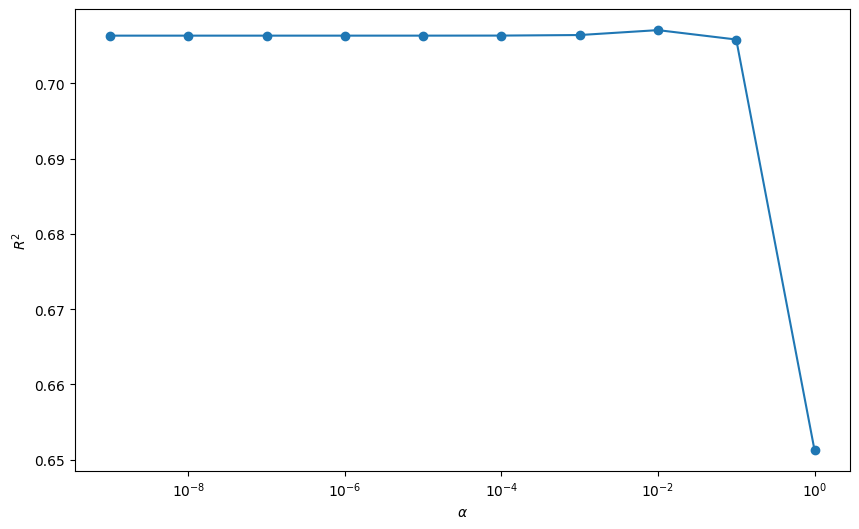

In [ ]:
# Vẽ đồ thị R² theo alpha trên thang logarit
plt.figure(figsize=(10,6))

# semilogx: trục X theo logarit, Y tuyến tính
plt.semilogx(alphas, scores, '-o')

# Gắn nhãn trục
plt.xlabel('$\\alpha$')  # Hệ số điều chuẩn alpha
plt.ylabel('$R^2$')      # Hệ số xác định R²


### Exercise

Add `PolynomialFeatures` to this `Pipeline`, and re-run the cross validation with the `PolynomialFeatures` added.

**Hint #1:** pipelines process input from first to last. Think about the order that it would make sense to add Polynomial Features to the data in sequence and add them in the appropriate place in the pipeline.

**Hint #2:** you should see a significant increase in cross validation accuracy from doing this


In [47]:
# Tạo đối tượng PolynomialFeatures để sinh các đặc trưng bậc 2
pf = PolynomialFeatures(degree=2)

# Danh sách lưu R² của từng alpha
scores = []

# Các giá trị alpha thử nghiệm
alphas = np.geomspace(0.001, 10, 5)

# Lặp qua từng alpha
for alpha in alphas:
    # Mô hình Lasso với alpha hiện tại
    las = Lasso(alpha=alpha, max_iter=100000)
    
    # Pipeline gồm:
    # 1. Sinh đặc trưng đa thức bậc 2
    # 2. Chuẩn hóa dữ liệu
    # 3. Lasso Regression
    estimator = Pipeline([
        ("make_higher_degree", pf),
        ("scaler", s),
        ("lasso_regression", las)
    ])
    
    # Dự đoán bằng cross-validation
    predictions = cross_val_predict(estimator, X, y, cv=kf)
    
    # Tính R² giữa giá trị thực và dự đoán
    score = r2_score(y, predictions)
    
    # Lưu R² vào danh sách
    scores.append(score)

# Hiển thị các giá trị R² tương ứng với các alpha
scores


[0.8465056899967278,
 0.8552553819994746,
 0.812453647729607,
 0.7090474482089187,
 -0.000616160136140298]

If you store the results in a list called `scores`, the following will work:


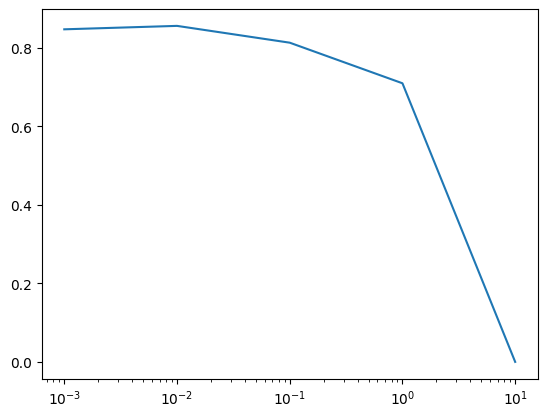

In [30]:
plt.semilogx(alphas, scores);

In [48]:
# Tạo mô hình cuối cùng với alpha tốt nhất (0.01) và đặc trưng đa thức bậc 2
best_estimator = Pipeline([
    ("make_higher_degree", PolynomialFeatures(degree=2)),  # Sinh đặc trưng bậc 2
    ("scaler", s),                                         # Chuẩn hóa dữ liệu
    ("lasso_regression", Lasso(alpha=0.01, max_iter=10000))  # Lasso với alpha tối ưu
])

# Huấn luyện mô hình trên toàn bộ dữ liệu
best_estimator.fit(X, y)

# Đánh giá R² trên toàn bộ dữ liệu
best_estimator.score(X, y)


0.9032551408154242

In [50]:
# Lấy các hệ số hồi quy của bước Lasso trong pipeline 'best_estimator'
# Hiển thị ảnh hưởng của từng feature (sau khi sinh đặc trưng đa thức và chuẩn hóa)
best_estimator.named_steps["lasso_regression"].coef_


array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        4.61127587e+00,  0.00000000e+00,  6.24240557e-01,  0.00000000e+00,
       -7.22878514e+00,  9.74968793e+00,  0.00000000e+00,  0.00000000e+00,
        6.34548325e-01,  0.00000000e+00,  9.95741679e-01, -5.51374291e-03,
       -0.00000000e+00,  2.44370838e+00, -2.40444044e+00, -0.00000000e+00,
       -0.00000000e+00, -2.23044443e-01, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -2.88128934e-01,  5.17203914e-01,  3.07715719e-01,
       -3.39853933e-01, -9.86590910e-02, -0.00000000e+00,  2.72847487e-01,
       -0.00000000e+00, -6.39829763e-01, -3.16474346e-01,  1.44555554e+00,
        0.00000000e+00, -0.00000000e+00, -8.84630187e-01,  1.32081558e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.63148300e+00,
       -2.62941147e-01,  0.00000000e+00,  9.08410143e-01, -8.17144528e-01,
        0.00000000e+00, -4.31628234e+00,  5.53254405e-01, -2.91912598e+00,
       -4.68486241e+00,  

### Exercise

Do the same, but with `Ridge` regression 

Which model, `Ridge` or `Lasso`, performs best with its optimal hyperparameters on the Boston dataset?


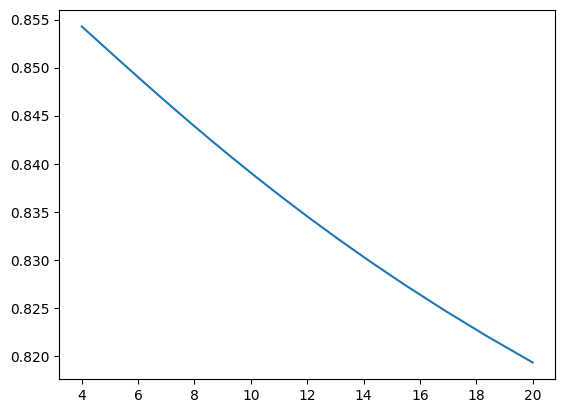

In [49]:
# Tạo đối tượng PolynomialFeatures bậc 2
pf = PolynomialFeatures(degree=2)

# Danh sách lưu R² của từng giá trị alpha
scores = []

# Các giá trị alpha thử nghiệm cho Ridge
alphas = np.geomspace(4, 20, 20)

# Lặp qua từng alpha
for alpha in alphas:
    # Khởi tạo Ridge Regression với alpha hiện tại
    ridge = Ridge(alpha=alpha, max_iter=100000)
    
    # Pipeline gồm:
    # 1. Sinh đặc trưng đa thức bậc 2
    # 2. Chuẩn hóa dữ liệu
    # 3. Ridge Regression
    estimator = Pipeline([
        ("polynomial_features", pf),
        ("scaler", s),
        ("ridge_regression", ridge)
    ])
    
    # Dự đoán bằng cross-validation
    predictions = cross_val_predict(estimator, X, y, cv=kf)
    
    # Tính R² và lưu vào danh sách
    score = r2_score(y, predictions)
    scores.append(score)

# Vẽ đồ thị R² theo alpha
plt.plot(alphas, scores)


**Conclusion:** Both Lasso and Ridge with proper hyperparameter tuning give better results than plain ol' Linear Regression!


### Exercise:


Now, for whatever your best overall hyperparameter was: 

* Standardize the data
* Fit and predict on the entire dataset
* See what the largest coefficients were
    * Hint: use 
    ```python
    dict(zip(model.coef_, pf.get_feature_names()))
    ```
    for your model `model` to get the feature names from `PolynomialFeatures`.
    
    Then, use
    ```python
    dict(zip(list(range(len(X.columns.values))), X.columns.values))
    ```
    
    to see which features in the `PolynomialFeatures` DataFrame correspond to which columns in the original DataFrame.


In [51]:
# Tạo mô hình cuối cùng với:
# - PolynomialFeatures bậc 2 (không thêm cột bias)
# - Chuẩn hóa dữ liệu bằng StandardScaler
# - Lasso Regression với alpha=0.01
best_estimator = Pipeline([
    ("make_higher_degree", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", s),
    ("lasso_regression", Lasso(alpha=0.01, max_iter=10000))
])

# Huấn luyện mô hình trên toàn bộ dữ liệu
best_estimator.fit(X, y)

# Đánh giá R² trên toàn bộ dữ liệu
best_estimator.score(X, y)


0.9032551408154242

In [53]:


df_importances = pd.DataFrame(
    zip(
        best_estimator.named_steps["make_higher_degree"].get_feature_names_out(X.columns),
        best_estimator.named_steps["lasso_regression"].coef_
    ),
    columns=["Feature", "Coefficient"]
)

# Hiển thị bảng tên feature và hệ số hồi quy
df_importances


,Feature,Coefficient
0,CRIM,-0.000000
1,ZN,-0.000000
2,INDUS,0.000000
3,CHAS,4.611276
4,NOX,0.000000
...,...,...
99,PTRATIO B,1.082758
100,PTRATIO LSTAT,0.000000
101,B^2,-0.407837
102,B LSTAT,-1.154277


In [54]:
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))

In [55]:
col_names_dict

{0: 'CRIM',
 1: 'ZN',
 2: 'INDUS',
 3: 'CHAS',
 4: 'NOX',
 5: 'RM',
 6: 'AGE',
 7: 'DIS',
 8: 'RAD',
 9: 'TAX',
 10: 'PTRATIO',
 11: 'B',
 12: 'LSTAT'}

In [57]:

# Sắp xếp theo hệ số (Coefficient)
df_importances_sorted = df_importances.sort_values(by="Coefficient")

# Hiển thị bảng đã sắp xếp
df_importances_sorted


,Feature,Coefficient
7,DIS,-7.228785
72,RM TAX,-6.677045
51,CHAS RM,-4.684862
93,RAD LSTAT,-4.545681
71,RM RAD,-4.430641
...,...,...
3,CHAS,4.611276
95,TAX PTRATIO,5.129595
103,LSTAT^2,5.635229
68,RM^2,8.594069


## Grid Search CV


To do cross-validation, we used two techniques:
- use `KFolds` and manually create a loop to do cross-validation
- use `cross_val_predict` and `score` to get a cross-valiated score in a couple of lines.

To do hyper-parameter tuning, we see a general pattern:
- use `cross_val_predict` and `score` in a manually written loop over hyperparemeters, then select the best one.

Perhaps not surprisingly, there is a function that does this for us -- `GridSearchCV`


In [59]:
# Tạo pipeline gồm:
# 1. PolynomialFeatures: sinh đặc trưng đa thức
# 2. StandardScaler: chuẩn hóa dữ liệu
# 3. Ridge Regression
estimator = Pipeline([
    ("polynomial_features", PolynomialFeatures()),
    ("scaler", StandardScaler()),
    ("ridge_regression", Ridge())
])

# Định nghĩa lưới tham số để GridSearchCV tìm tham số tối ưu
params = {
    'polynomial_features__degree': [1, 2, 3],       # thử các bậc đa thức khác nhau
    'ridge_regression__alpha': np.geomspace(4, 20, 20)  # thử các giá trị alpha cho Ridge
}
from sklearn.model_selection import GridSearchCV
# Tạo GridSearchCV với cross-validation theo KFold
grid = GridSearchCV(estimator, params, cv=kf)





In [60]:
grid.fit(X, y)

,estimator,"Pipeline(step...n', Ridge())])"
,param_grid,"{'polynomial_features__degree': [1, 2, ...], 'ridge_regression__alpha': array([ 4. ... 20. ])}"
,scoring,None
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,degree,2


In [61]:
grid.best_score_, grid.best_params_

(np.float64(0.8546333782070423),
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': np.float64(4.0)})

In [68]:
# Import các thư viện cần thiết cho xử lý dữ liệu, hồi quy và chuẩn hóa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy.stats.mstats import normaltest
from scipy.stats import boxcox
from scipy.special import inv_boxcox

# Đọc dữ liệu Boston Housing từ URL
file_name = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_data = pd.read_csv(file_name)

# Khởi tạo mô hình hồi quy tuyến tính
lr = LinearRegression()

# Tách features và target
y_col = "MEDV"
X = boston_data.drop(y_col, axis=1)
y = boston_data[y_col]

# Sinh các đặc trưng đa thức bậc 2
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, random_state=72018)

# Chuẩn hóa dữ liệu train
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

# Áp dụng Box-Cox transformation cho y_train
bc_result = boxcox(y_train)
y_train_bc = bc_result[0]  # Giá trị đã chuyển đổi
lam = bc_result[1]         # Tham số lambda

# Huấn luyện hồi quy tuyến tính với y đã Box-Cox
lr.fit(X_train_s, y_train_bc)

# Chuẩn hóa dữ liệu test
X_test_s = s.transform(X_test)

# Dự đoán và chuyển ngược về scale gốc
y_pred_bc = lr.predict(X_test_s)
y_pred_tran = inv_boxcox(y_pred_bc, lam)

# Tính R² giữa dự đoán đã chuyển ngược và giá trị thực
print(r2_score(y_pred_tran, y_test))  # R² ~0.848

# So sánh với hồi quy tuyến tính trực tiếp (không Box-Cox)
lr = LinearRegression()
lr.fit(X_train_s, y_train)
lr_pred = lr.predict(X_test_s)
r2_score(lr_pred, y_test)  # R² ~0.867


0.8480525387339697


0.8667029116056792

## Summary

1. We can manually generate folds by using `KFolds`
2. We can get a score using `cross_val_predict(X, y, cv=KFoldObject_or_integer)`. 
   This will produce the out-of-bag prediction for each row.
3. When doing hyperparameter selection, we should be optimizing on out-of-bag scores. This means either using `cross_val_predict` in a loop, or ....
4. .... use `GridSearchCV`. GridSearchCV takes a model (or pipeline) and a dictionary of parameters to scan over. It finds the hyperparameter set that has the best out-of-sample score on all the parameters, and calls that it's "best estimator". It then retrains on all data with the "best" hyper-parameters.

### Extensions

Here are some additional items to keep in mind:
* There is a `RandomSearchCV` that tries random combination of model parameters. This can be helpful if you have a prohibitive number of combinations to test them all exhaustively.
* KFolds will randomly select rows to be in the training and test folds. There are other methods (such as `StratifiedKFolds` and `GroupKFold`, which are useful when you need more control over how the data is split (e.g. to prevent data leakage). You can create these specialized objects and pass them to the `cv` argument of `GridSearchCV`.


---
### Machine Learning Foundation (C) 2020 IBM Corporation
